## Livrable final Projet algorithmique - Modélisation & Complexité

| Groupe 2 : | Landelouci Mohamed Adel | Babaali Amine | Feddag Sabine | Debaghi Nabila | Talaoubrid Leryem Minel |
|------------|-------------------------|---------------|---------------|----------------|-------------------------|

-----

# Livrable Final du Projet

## I. Introduction
L'Agence de la Transition Écologique (ADEME) a initié un appel à projets pour encourager le développement de technologies et de solutions innovantes visant à réduire l'impact environnemental des activités humaines. La modélisation formelle des problèmes est une étape essentielle pour comprendre les dynamiques complexes et développer des solutions algorithmiques optimisées. 


## Partie 1 : Modélisation
----
## III. Définition du Problème

### 1. Contexte et Importance

Le problème étudié dans ce document concerne la gestion optimale des tournées de livraison pour minimiser les coûts et maximiser l'efficacité. Avec l'augmentation de la demande pour des livraisons rapides et efficaces, il est crucial de développer des solutions logistiques avancées. L'objectif principal est de trouver les trajets optimaux pour les véhicules de livraison en tenant compte des distances variables dues aux conditions de trafic, tout en assurant une livraison ponctuelle et fiable.

### Problématique

Le problème que nous adressons est celui du Problème du Voyageur de Commerce (TSP - Traveling Salesman Problem). Il consiste à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée. Cette optimisation doit tenir compte du trafic prévu sur chaque axe pour les différentes tranches horaires.

### 2. Objectifs

- **Minimiser les Distances Totales** : Réduire les distances parcourues par les véhicules de livraison pour minimiser les coûts de transport et les émissions de CO2.
- **Optimiser les Itinéraires** : Déterminer les itinéraires les plus efficaces en tenant compte des variations de distance dues aux conditions de trafic.
- **Assurer la Fiabilité des Livraisons** : Garantir que toutes les livraisons sont effectuées dans les délais prévus.
- **Adapter aux Conditions de Trafic** : Intégrer les informations de trafic en temps réel pour ajuster les itinéraires et améliorer l'efficacité.

### 3. Contraintes

- **Capacité des Véhicules** : Chaque véhicule de livraison a une capacité maximale de chargement qu'il ne peut pas dépasser.
- **Variabilité des Distances** : Les distances entre les nœuds (clients et dépôt) varient en fonction du temps, ce qui reflète les conditions de trafic.
- **Équilibre des Tournées** : Chaque tournée doit être équilibrée en termes de charge de travail pour optimiser l'utilisation des ressources.
- **Réglementations** : Respect des réglementations locales et internationales en matière de transport et de logistique.

### 4. Contraintes de la Taille Variable des Arêtes

La contrainte choisie est la variation des temps de parcours sur les arêtes en fonction du trafic. Cela signifie que le temps nécessaire pour parcourir une route donnée change en fonction de l'heure de la journée.
- **Modélisation du Trafic** : Les distances $ d_{ij}(t) $ entre les nœuds $ i $ et $ j $ varient en fonction du temps $ t $. Cette variation est due aux conditions de trafic qui peuvent changer au cours de la journée.
- **Impact sur la Planification** : La planification des tournées doit intégrer ces variations pour optimiser les trajets en temps réel et minimiser les temps de parcours.

----
## IV. Modélisation du problème 

### 1. Définir les composantes de base du problème

**Graphe et Notations**
- **Graphe $ G = (V, E) $** : Où $V$ est l'ensemble des nœuds (clients et dépôt) et $E$ l'ensemble des arêtes représentant les routes possibles entre les nœuds.

- **Nœuds $ V = \{0, 1, ..., n\} $** : Où $0$ est le dépôt et $\{0, 1, ..., n\}$ sont les clients.

- **Arêtes $ E = \{(i, j) \mid i, j \in V, i \neq j \} $**.

**Paramètres**
- **$ d_{ij}(t) $** : Distance entre le nœud $i$ et le nœud $j$.

### 2. Variables de décision

- $ x_{ij} $ : Variable binaire égale à 1 si la route entre $i$ et $j$ est empruntée, 0 sinon.
-  $u_i$  : Variable auxiliaire pour éliminer les sous-tours.

### 3. Fonction objectif

Minimiser la distance totale parcourue par le voyageur :

$$
\text{Min} \sum_{i \in V} \sum_{j \in V} d_{ij} x_{ij} (t)
$$

### 4. Contraintes

**Contraintes de parcours**

1. Chaque nœud est visité exactement une fois :
$$
\sum_{j \in V, j \neq i} x_{ij} = 1, \quad \forall i \in V
$$

2. Chaque nœud est quitté exactement une fois :
$$
\sum_{i \in V, i \neq j} x_{ij} = 1, \quad \forall j \in V
$$


----
# Partie 2 : Implémentation

### Choix de l'Algorithme

Pour résoudre ce problème, nous avons utilisé deux techniques complémentaires : le clustering k-means et la recherche tabou. 

Au début nous avons opté pour la méthode génétique, mais la solution finale n'était pas optimale car la solution initiale ne l'etait pas aussi, comme on peut le voir ici :

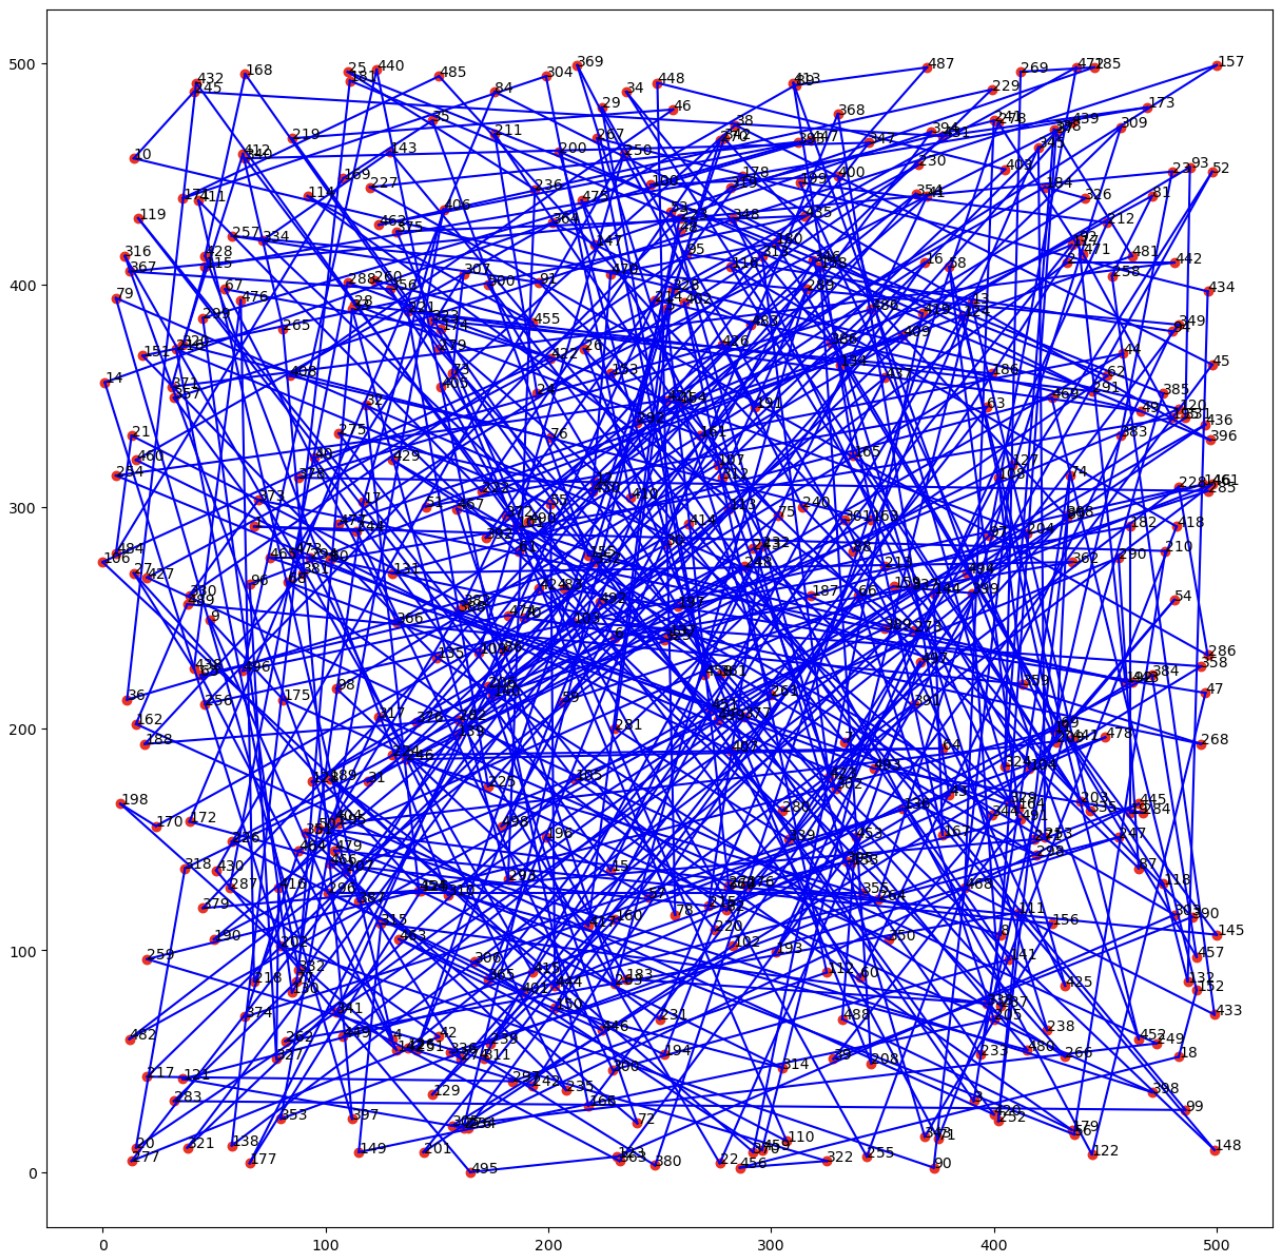

In [3]:
from IPython.display import Image
Image("image-2.png")

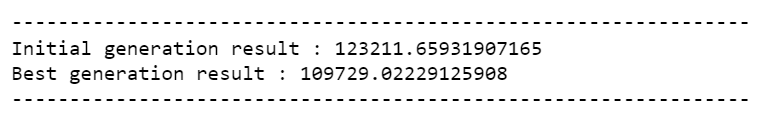

In [1]:
from IPython.display import Image
Image("image-3.png")

Pour résoudre ce problème, nous avons donc opté pour deux techniques complémentaires : le clustering k-means et la recherche tabou. 

#### Clustering k-means

Le clustering k-means est une méthode de partitionnement de données largement utilisée dans l’apprentissage automatique et l’optimisation. L’objectif est de diviser un ensemble de données en k groupes distincts, appelés clusters. Le processus commence par la sélection aléatoire de k points initiaux, appelés centroids. Chaque point de données est ensuite assigné au centroid le plus proche, formant ainsi k clusters. Une fois les points assignés, les centroids sont mis à jour en calculant la moyenne des points de chaque cluster. Ce processus d’assignation et de mise à jour est répété jusqu’à ce que les centroids ne changent plus significativement ou jusqu’à ce qu’un critère d’arrêt soit atteint.

Dans le contexte du Problème du Voyageur de Commerce (TSP), le clustering k-means est utilisé pour diviser le problème global en plusieurs sous-problèmes plus petits. En regroupant les villes en k clusters basés sur leur proximité géographique, la complexité du problème initial est réduite, rendant chaque sous-problème plus facile à résoudre. Chaque cluster représente un sous-ensemble de villes qui peut être optimisé individuellement avant de combiner les résultats pour obtenir une solution globale.


#### Recherche Tabou

La recherche tabou est une méthode d’optimisation métaheuristique utilisée pour trouver des solutions approximatives à des problèmes d’optimisation combinatoire. Cette méthode commence par une solution initiale, qui peut être générée de manière aléatoire ou par une méthode heuristique. Pour explorer de nouvelles solutions, la recherche tabou génère des solutions voisines en modifiant légèrement la solution actuelle, par exemple en échangeant deux villes dans une tournée pour le TSP. La meilleure solution voisine qui n’est pas dans la liste tabou est ensuite sélectionnée.

La liste tabou garde une trace des solutions précédemment explorées, ce qui permet d’éviter de revenir à ces solutions et d’échapper aux minima locaux. La recherche tabou itère ce processus de génération de voisins, d’évaluation et de mise à jour de la solution actuelle jusqu’à ce qu’un critère d’arrêt soit atteint, comme un nombre maximum d’itérations ou un seuil de qualité de solution. Cette approche permet d’explorer efficacement l’espace de solution et d’améliorer progressivement la qualité des solutions trouvées.

### Utilisation dans le Contexte du TSP

Dans le cadre du TSP, le clustering k-means et la recherche tabou sont utilisés de manière complémentaire pour optimiser les tournées de livraison. Le clustering k-means est d’abord appliqué pour diviser le problème global en plusieurs sous-problèmes en regroupant les villes en k clusters. Cela permet de traiter chaque cluster séparément, réduisant ainsi la complexité du problème initial. Une fois les clusters formés, la recherche tabou est utilisée pour optimiser les tournées de livraison au sein de chaque cluster.

La recherche tabou commence par une solution initiale générée en fonction des clusters (psq en gros une solution initial pertinente donne une solution finale pertinente) , puis explore les solutions voisines tout en utilisant une liste tabou pour éviter de revisiter les solutions précédemment explorées. En combinant les solutions optimisées de chaque cluster, une solution globale pour le TSP est obtenue. 

voici les résultats obtenu, on peut remarqué qu'avec les cluster nous avons une solution finale trés optimisée qui s'execute rapidement :


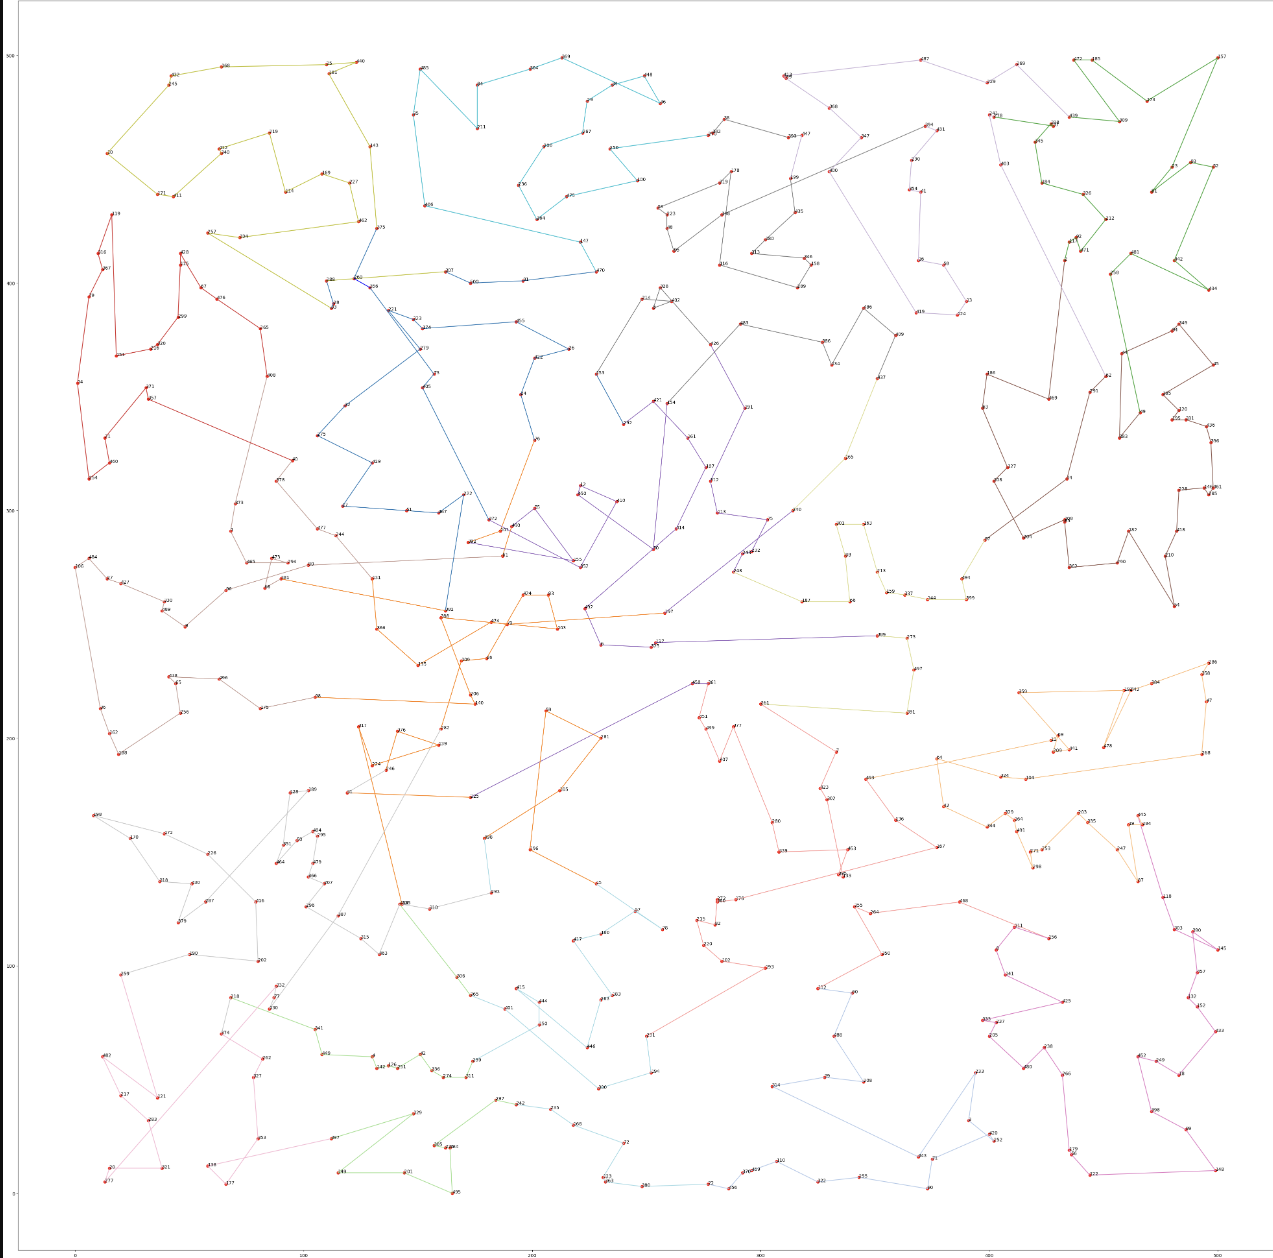

In [4]:
from IPython.display import Image
Image("image-4.png")

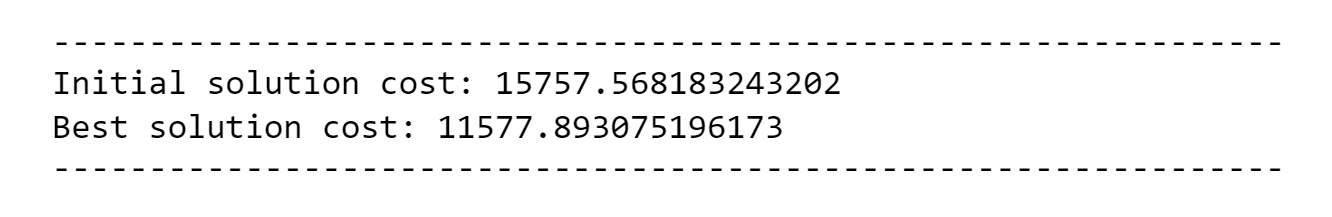

In [5]:
from IPython.display import Image
Image("image-5.png")

----
## Performance et tests 
Notre fonction "analyze_performance" évalue la performance de notre algorithme en testant différentes combinaisons de paramètres. Les paramètres évalués incluent le nombre de clusters (k_clusters), la durée de la liste Tabu (tabu_tenure), et le nombre d’itérations (iterations).

La fonction commence par récupérer les villes et calculer la matrice des distances, puis elle itère à travers toutes les combinaisons possibles des paramètres en affichant les informations de chaque itération. Pour chaque combinaison, elle génère une solution initiale, exécute l’algorithme pour améliorer cette solution, et enregistre le temps de calcul. 

Les résultats (coût de la solution initiale, meilleur coût trouvé, temps de calcul) sont collectés et stockés dans une liste, puis convertis en DataFrame pour l’analyse.

 Deux graphiques sont générés : l’un montre le coût de la meilleure solution trouvée en fonction du nombre d’itérations pour différents nombres de clusters K, et l’autre montre le temps de calcul en fonction du nombre d’itérations pour différents nombres de clusters K. Ces visualisations permettent de déterminer l’impact des paramètres sur la qualité de la solution et l’efficacité de l’algorithme, aidant ainsi à identifier les configurations les plus efficaces.


### Graphiques 
Les deux graphiques representent les performances de notre algorithme en fonction de différents paramètres.

Le premier graphique illustre l’évolution du temps de calcul en fonction du nombre d’itérations pour divers nombres de clusters (K_CLUSTERS). On observe que le temps de calcul augmente de manière linéaire avec les itérations pour toutes les valeurs de K_CLUSTERS, avec des valeurs plus faibles de K (comme 5 et 10) affichant des temps de calcul plus élevés comparées aux valeurs plus élevées (comme 25 et 30). Cela suggère que des valeurs plus faibles de K augmentent la complexité computationnelle.

Le deuxième graphique montre le coût de la meilleure solution trouvée en fonction des itérations pour différents K_CLUSTERS. Ici, le coût de la solution tend à diminuer avec le nombre d’itérations, indiquant une amélioration continue de l’algorithme. Les valeurs plus élevées de K_CLUSTERS montrent des coûts initiaux plus élevés mais convergent vers des solutions de qualité comparable après de nombreuses itérations, tandis que les valeurs plus faibles de K commencent avec des coûts initiaux plus bas mais améliorent plus lentement. 

Ces graphiques prouvent que le choix de K_CLUSTERS influence à la fois le temps de calcul et la qualité de la solution, avec des valeurs plus faibles augmentant le temps de calcul mais produisant des solutions de meilleure qualité plus rapidement, et des valeurs plus élevées étant plus efficaces en termes de temps mais nécessitant plus d’itérations pour atteindre des solutions optimales. 

Notre partie tests des performances aide à trouver un équilibre entre le temps de calcul et la qualité de la solution en fonction des besoins spécifiques de l’application.